# <center> Преобразование признаков. Нормализация. Стандартизация

Используем библиотеку `numpy` для создания массивов случайных чисел различных распределений. Выполните этот код, чтобы создать обучающий набор различных распределений:

In [2]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

Рассмотрим распределения на графике. Метод визуализации kdeplot() — это метод визуализации распределения наблюдений в наборе данных. Он представляет собой непрерывную линию плотности вероятности.

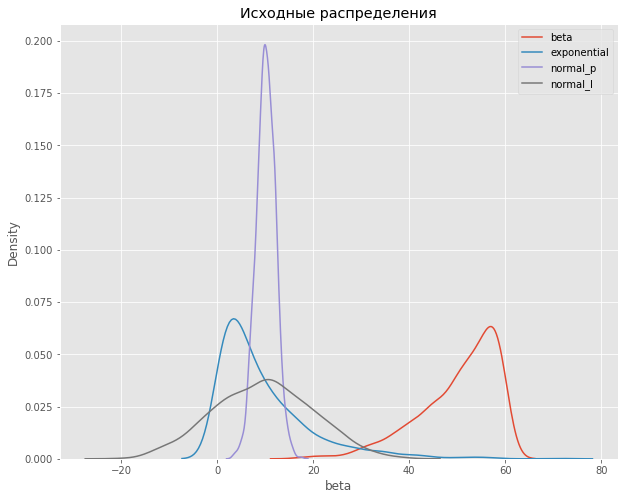

In [8]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

Признаки распределены по-разному: смещены влево, вправо, присутствуют отрицательные величины. Попробуем нормализовать их.

Зафиксируем описательные статистики до преобразований.

In [9]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.266317,9.659953,10.135551,9.686073
std,8.221142,9.753128,1.999617,10.203403
min,17.301655,0.006211,3.448411,-19.810394
25%,45.511912,2.916194,8.808817,2.383027
50%,52.339458,6.438676,10.117422,9.834853
75%,56.833225,13.296683,11.550780,16.847546
max,59.998953,70.821426,17.405999,38.736675


Для нормализации данных мы будем использовать уже знакомую нам библиотеку sklearn.

## MINMAXSCALER

При применении нормализации методом `MinMaxScaler` все значения признаков будут преобразованы в диапазон `[0,1]`, что означает, что минимальное и максимальное значение признака будет равно 0 и 1 соответственно.

Нормализация происходит следующим способом:

1. Из каждого значения признака х вычитается минимальное значение этого признака,
2. Результат вычитания делится на разность между максимумом и минимумом признака

<AxesSubplot:title={'center':'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

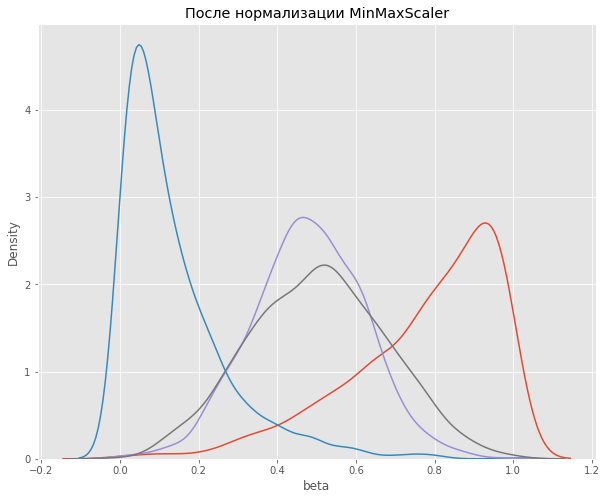

In [12]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# копируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

## ROBUSTSCALER

Нормализация методом RobustScaler происходит в несколько этапов:

1. из каждого значения признака вычитается медиана признака,
2. полученное значение делится на межквартильный размах

Проведём нормализацию распределений признаков из обучающего примера, используя класс `RobustScaler`.

<AxesSubplot:title={'center':'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

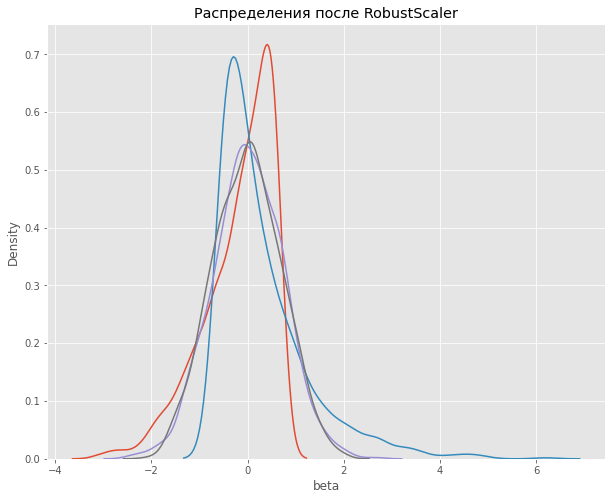

In [13]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

RobustScaler в вычислении использует перцентили, и поэтому не зависит даже от большого количества выбросов.

Поэтому, если ваши данные уже были очищены от выбросов, смело используйте MinMaxScaler. Этот алгоритм нормализации используется специалистами по данным чаще всего в силу его простоты и понятности, а данные на этом этапе чаще всего уже очищены. Если вы пропустили этап очистки данных и нормализуете признаки раньше, используйте нормализатор RobustScaler.

## Стандартизация

Стандартизация — ещё один метод преобразования входных признаков, при котором изменяется распределение таким образом, чтобы среднее значений равнялось 0, а стандартное отклонение — 1. 

Как и нормализация, стандартизация может быть полезна при данных с разными масштабами. Однако в отличие от нормализации стандартизация предполагает, что признак распределён нормально.

## STANDARDSCALER

<AxesSubplot:title={'center':'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

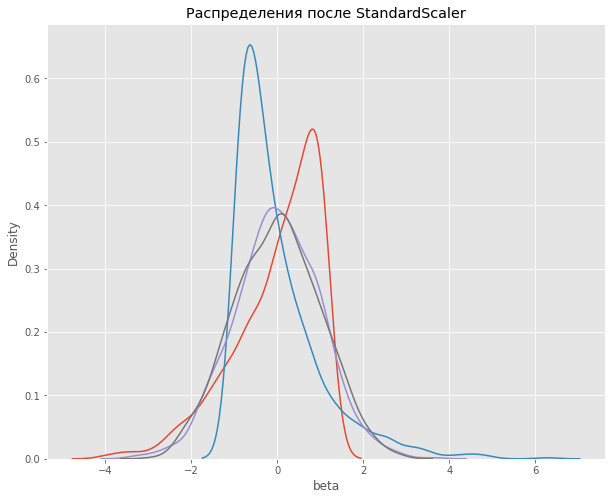

In [14]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

## НОРМАЛИЗОВАТЬ ИЛИ СТАНДАРТИЗИРОВАТЬ?